# Softmax Regression for MNIST Classification

This notebook demonstrates the implementation of Softmax Regression for the MNIST dataset. We will apply Softmax Regression to classify handwritten digits (0-9) from the MNIST dataset using gradient descent and the One-vs-Rest strategy.

In [36]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Load the MNIST Data

In [37]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)  # features and target labels

# Train-Test Split

In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize Data

In [39]:
# Normalize the data (scaling the pixel values to [0, 1])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data: Flatten each 28x28 image into a 784-dimensional vector
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Display Five Sample Images (From Test Data)

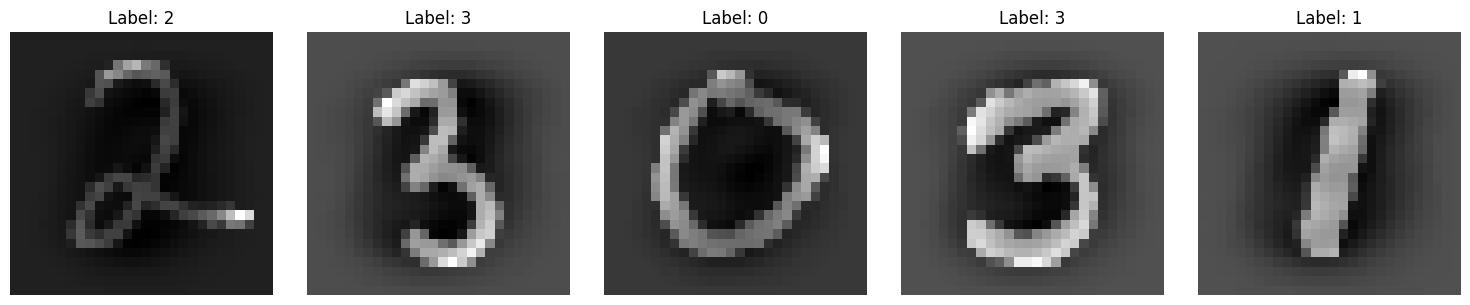

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure that both X_test and y_test are NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Create a figure with 1 row and 5 columns for displaying 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))  # Adjust the figsize for smaller images

# Display 5 random images from the test set
for i in range(5):
    idx = np.random.randint(0, len(X_test))  # Random index from the test set
    axes[i].imshow(X_test[idx].reshape(28, 28), cmap="gray")  # Reshape to 28x28
    axes[i].set_title(f"Label: {y_test[idx]}")  # Show the true label
    axes[i].axis('off')  # Hide axis for clarity

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


### One-Hot Encoding
We will now perform one-hot encoding of the target labels. This will convert the labels (digits 0-9) into a binary vector representation, where each class corresponds to a unique binary vector.

In [41]:
# One-hot encoding of target labels
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

### Softmax Function
The Softmax function transforms the raw output of the model (logits) into probabilities for each class, which sum to 1. It is crucial for multiclass classification.

In [42]:
# Softmax function for multiclass classification
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # To avoid overflow
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

### Training Softmax Regression
In this step, we will train the Softmax Regression model using mini-batch gradient descent. The model parameters will be updated iteratively to minimize the loss function.

In [43]:
# Function to train the Softmax Regression model
def softmax_regression(X, y, learning_rate=0.1, num_epochs=100, batch_size=64):
    num_samples, num_features = X.shape
    num_classes = y.shape[1]

    # Initialize weights (one per class)
    theta = np.random.randn(num_features, num_classes)

    # Training loop
    for epoch in range(num_epochs):
        # Shuffle the data
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Mini-batch gradient descent
        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute the predictions using the softmax function
            logits = np.dot(X_batch, theta)
            y_pred = softmax(logits)

            # Compute the gradient of the loss w.r.t. theta
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / batch_size

            # Update weights using gradient descent
            theta -= learning_rate * gradient

        # Optionally print progress every 100 epochs
        if epoch % 2 == 0:
            loss = -np.mean(np.sum(y_batch * np.log(y_pred), axis=1))  # Cross-entropy loss
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    return theta

### Train the Model
Now, let's train the Softmax Regression model using the training data and observe the progress.

In [44]:
# Train the Softmax Regression model
theta = softmax_regression(X_train, y_train_one_hot, learning_rate=0.1, num_epochs=100, batch_size=64)

Epoch 0, Loss: 1.8970
Epoch 2, Loss: 0.8907
Epoch 4, Loss: 0.6440
Epoch 6, Loss: 0.8920
Epoch 8, Loss: 0.8572
Epoch 10, Loss: 0.5160
Epoch 12, Loss: 0.2308
Epoch 14, Loss: 0.5065
Epoch 16, Loss: 0.4269
Epoch 18, Loss: 1.1343
Epoch 20, Loss: 0.8373
Epoch 22, Loss: 0.3787
Epoch 24, Loss: 0.5697
Epoch 26, Loss: 1.2191
Epoch 28, Loss: 0.2225
Epoch 30, Loss: 1.4066
Epoch 32, Loss: 0.1664
Epoch 34, Loss: 0.3721
Epoch 36, Loss: 0.3421
Epoch 38, Loss: 0.2986
Epoch 40, Loss: 0.2317
Epoch 42, Loss: 0.8630
Epoch 44, Loss: 0.4646
Epoch 46, Loss: 0.2177
Epoch 48, Loss: 0.1476
Epoch 50, Loss: 0.3563
Epoch 52, Loss: 0.2695
Epoch 54, Loss: 0.4797
Epoch 56, Loss: 0.4294
Epoch 58, Loss: 0.1874
Epoch 60, Loss: 0.2127
Epoch 62, Loss: 0.2374
Epoch 64, Loss: 0.1475
Epoch 66, Loss: 0.4143
Epoch 68, Loss: 0.0816
Epoch 70, Loss: 0.2226
Epoch 72, Loss: 0.1956
Epoch 74, Loss: 0.4013
Epoch 76, Loss: 0.3500
Epoch 78, Loss: 0.1243
Epoch 80, Loss: 0.1308
Epoch 82, Loss: 0.1447
Epoch 84, Loss: 0.3505
Epoch 86, Loss: 

### Predictions and Evaluation
After training the model, we will use it to make predictions on the test set and evaluate its performance using accuracy.

In [45]:
# Predict on the test set
def predict(X, theta):
    logits = np.dot(X, theta)
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis=1)

y_pred = predict(X_test, theta)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.34%


### Confusion Matrix Visualization
Let's visualize the confusion matrix to better understand the model's performance across different digits.

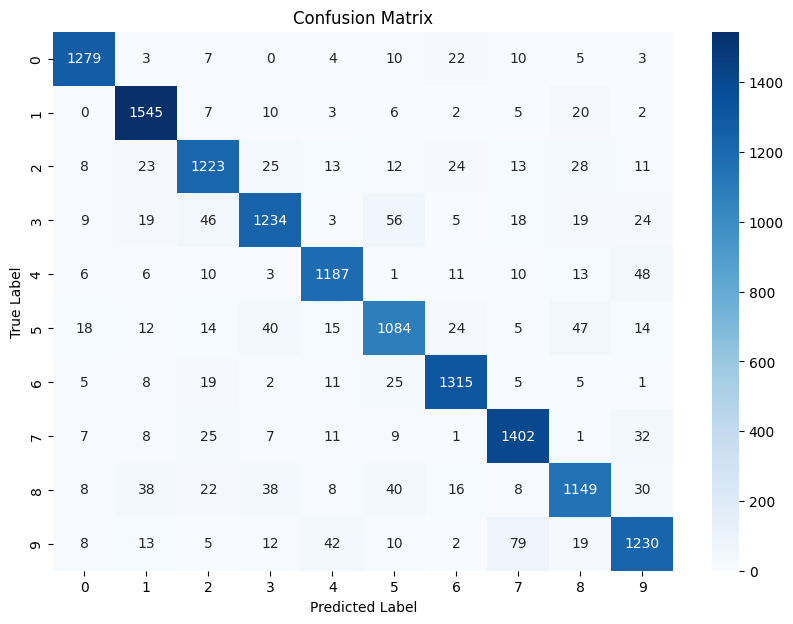

In [46]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

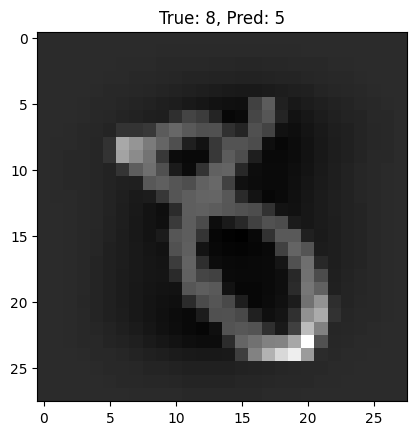

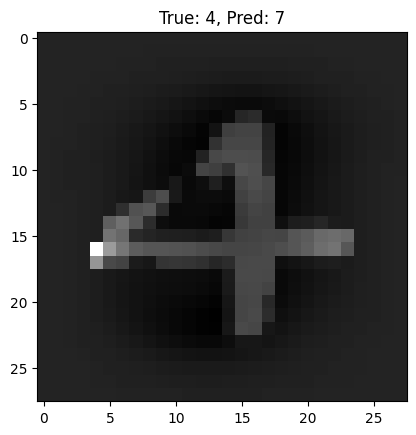

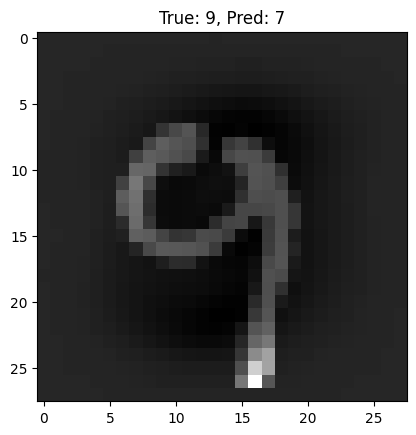

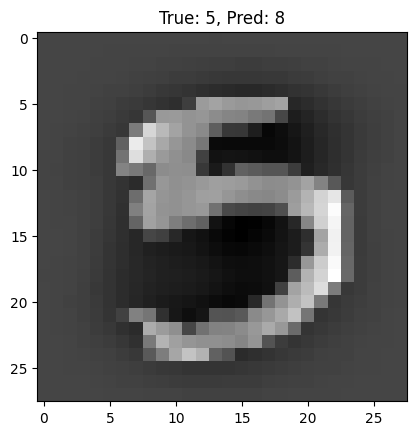

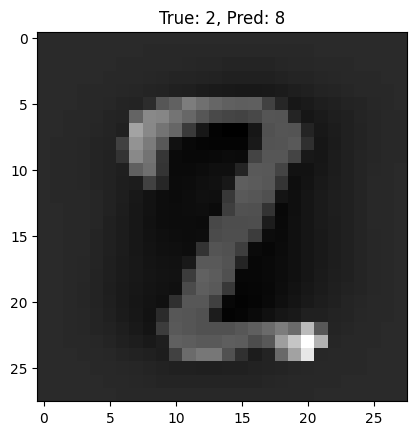

In [47]:
# Ensure y_test is a numpy array (in case it's a pandas Series or DataFrame)
y_test = np.array(y_test)

# Visualize some misclassifications
misclassified_idx = np.where(y_pred != y_test)[0]

# Make sure we do not exceed the number of misclassified images
num_misclassified = len(misclassified_idx)
num_to_show = min(5, num_misclassified)  # Show at most 5 misclassified images

for i in range(num_to_show):
    idx = misclassified_idx[i]
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.show()
